# Analysing evaluation results for composite reward with CAPPED accum waiting time

In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_12_05__alpha_0.6", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_14_43__alpha_0.8", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_15_54__alpha_0.7", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_17_47__alpha_0.65",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_18_55__alpha_0.75", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_19_57__alpha_0.9", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_00__alpha_1"
                            ]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    trained_0_6_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_6",
                                    seed = seed)
    trained_0_8_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_8",
                                    seed = seed)
    trained_0_7_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_7",
                                    seed = seed)
    trained_0_65_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_65",
                                seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_9_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_9",
                                seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df,
                                     trained_0_6_df,
                                     trained_0_65_df,
                                     trained_0_7_df,
                                     trained_0_75_df,
                                     trained_0_8_df,
                                     trained_1_df,
                                     trained_0_9_df], axis=0)
    return alpha_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [10]

alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,21770.531872,15099.992729,15729.443930,10825.662088,4.354106,3.019999,3.145889,2.165132,92.7130,63.6820,71.5226,49.6070,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0_6,12.614826,15.716743,87.899766,63074.128281,63067.353435,247.016013,1.500610,15.287334,0.000000,15.287334,1.358832,1.267358,49.7062,9642.7522,11456.885930,5235.457915,25959.844019,6485.245346,2.291377,1.047092,5.191969,1.297049,11382.5916,10322.9540,2527.5562,-0.2720,12.926211,9.827487,49.7062,248531.0,24232.8298
alpha_0_65,9.393325,10.484188,21.687984,46966.622767,46961.978690,109.918192,4.429927,15.287334,1.040909,14.246425,4.392482,1.134501,19.5140,45995.1320,3264.630242,2620.200211,12151.233173,11064.882482,0.652926,0.524040,2.430247,2.212976,16794.9110,0.0000,3.7310,2.2140,6.880134,5.820189,19.5140,97570.0,16800.8560
alpha_0_7,17.450024,18.910003,53.095475,87250.121026,87241.893196,357.588201,5.433512,15.287334,1.784191,13.503143,5.379081,1.218217,12.7814,212.8304,29550.411369,10169.799439,12513.436335,11582.499339,5.910082,2.033960,2.502687,2.316500,1189.7762,2.4522,2.8668,2.6156,14.261544,12.763229,12.7814,63907.0,1197.7108
alpha_0_75,15.743942,17.049551,42.824039,78719.709837,78712.026743,290.687183,10.216625,15.287334,5.788285,9.499049,10.240861,1.432552,1.6166,8.5526,15224.893217,13092.581610,13331.567326,11180.822984,3.044979,2.618516,2.666313,2.236165,3.7680,2.3372,2.4164,1.4978,11.887095,10.565973,1.6166,8083.0,10.0194
alpha_0_8,16.793392,18.007421,42.257650,83966.960324,83961.399982,324.267215,9.959371,15.287334,5.265554,10.021780,9.951863,1.455701,1.8298,9.2852,16450.556734,13437.644662,14543.097699,12302.916248,3.290111,2.687529,2.908620,2.460583,4.4596,2.0002,2.8902,1.8582,12.576094,11.346843,1.8298,9149.0,11.2082
alpha_0_9,14.808034,16.058508,38.605548,74040.167854,74035.857185,257.875685,10.426524,15.287334,7.162871,8.124463,10.412390,1.273792,1.5252,9.5266,13642.429486,12152.823917,12234.323792,10799.508498,2.728486,2.430565,2.446865,2.159902,4.1092,2.3332,2.2092,1.8916,10.955222,9.765817,1.5252,7626.0,10.5432


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0_6,12.614826,15.716743,87.899766,63074.128281,63067.353435,247.016013,1.500610,15.287334,0.000000,15.287334,1.358832,1.267358,49.7062,9642.7522,11456.885930,5235.457915,25959.844019,6485.245346,2.291377,1.047092,5.191969,1.297049,11382.5916,10322.9540,2527.5562,-0.2720,12.926211,9.827487,49.7062,248531.0,24232.8298
alpha_0_65,9.393325,10.484188,21.687984,46966.622767,46961.978690,109.918192,4.429927,15.287334,1.040909,14.246425,4.392482,1.134501,19.5140,45995.1320,3264.630242,2620.200211,12151.233173,11064.882482,0.652926,0.524040,2.430247,2.212976,16794.9110,0.0000,3.7310,2.2140,6.880134,5.820189,19.5140,97570.0,16800.8560
alpha_0_7,17.450024,18.910003,53.095475,87250.121026,87241.893196,357.588201,5.433512,15.287334,1.784191,13.503143,5.379081,1.218217,12.7814,212.8304,29550.411369,10169.799439,12513.436335,11582.499339,5.910082,2.033960,2.502687,2.316500,1189.7762,2.4522,2.8668,2.6156,14.261544,12.763229,12.7814,63907.0,1197.7108
alpha_0_75,15.743942,17.049551,42.824039,78719.709837,78712.026743,290.687183,10.216625,15.287334,5.788285,9.499049,10.240861,1.432552,1.6166,8.5526,15224.893217,13092.581610,13331.567326,11180.822984,3.044979,2.618516,2.666313,2.236165,3.7680,2.3372,2.4164,1.4978,11.887095,10.565973,1.6166,8083.0,10.0194
alpha_0_8,16.793392,18.007421,42.257650,83966.960324,83961.399982,324.267215,9.959371,15.287334,5.265554,10.021780,9.951863,1.455701,1.8298,9.2852,16450.556734,13437.644662,14543.097699,12302.916248,3.290111,2.687529,2.908620,2.460583,4.4596,2.0002,2.8902,1.8582,12.576094,11.346843,1.8298,9149.0,11.2082
alpha_0_9,14.808034,16.058508,38.605548,74040.167854,74035.857185,257.875685,10.426524,15.287334,7.162871,8.124463,10.412390,1.273792,1.5252,9.5266,13642.429486,12152.823917,12234.323792,10799.508498,2.728486,2.430565,2.446865,2.159902,4.1092,2.3332,2.2092,1.8916,10.955222,9.765817,1.5252,7626.0,10.5432
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,21770.531872,15099.992729,15729.443930,10825.662088,4.354106,3.019999,3.145889,2.165132,92.7130,63.6820,71.5226,49.6070,14.415043,12.685126,11.6588,58294.0,277.5246


- 0.6 we need to repeat that because the training workers are very different - we used 1 worker whereas all others we used many
- 0.8 and 0.75 worked best out of the rest. 

0.8 is best so far, it reduces absolute accelerations whilst also reducing the waiting time. 

In [6]:
df_average_whole_experiment[["sys_abs_accel_episode_mean",
                             "sys_abs_accel_episode_sum",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_avg_speed_episode_mean",

                             "1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"
                             ]]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_avg_speed_episode_mean,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0_6,12.614826,63074.128281,9642.7522,1.500610,2.291377,11456.885930,11382.5916,1.047092,5235.457915,10322.9540,5.191969,25959.844019,2527.5562,1.297049,6485.245346,-0.2720
alpha_0_65,9.393325,46966.622767,45995.1320,4.429927,0.652926,3264.630242,16794.9110,0.524040,2620.200211,0.0000,2.430247,12151.233173,3.7310,2.212976,11064.882482,2.2140
alpha_0_7,17.450024,87250.121026,212.8304,5.433512,5.910082,29550.411369,1189.7762,2.033960,10169.799439,2.4522,2.502687,12513.436335,2.8668,2.316500,11582.499339,2.6156
alpha_0_75,15.743942,78719.709837,8.5526,10.216625,3.044979,15224.893217,3.7680,2.618516,13092.581610,2.3372,2.666313,13331.567326,2.4164,2.236165,11180.822984,1.4978
alpha_0_8,16.793392,83966.960324,9.2852,9.959371,3.290111,16450.556734,4.4596,2.687529,13437.644662,2.0002,2.908620,14543.097699,2.8902,2.460583,12302.916248,1.8582
alpha_0_9,14.808034,74040.167854,9.5266,10.426524,2.728486,13642.429486,4.1092,2.430565,12152.823917,2.3332,2.446865,12234.323792,2.2092,2.159902,10799.508498,1.8916
fixed_tc,17.799791,88998.956683,241.2870,6.265263,4.354106,21770.531872,92.7130,3.019999,15099.992729,63.6820,3.145889,15729.443930,71.5226,2.165132,10825.662088,49.6070


0.6 is a disaster. the coefficient is almost keeping the entire congestion term diminish. 
0.65 follows a similar pattern to 0.6 -> it has a considerable lower emissions mainly because it causes all the cars to halt.  
0.7 -> is where we begin seeing improvement in emissions compared to the respective fixed control baseline. This can be said the same for 2 agents in the environment, where the other 2 perform same emissions as the fixed control baseline. For the waiting time, it is less than the original fixed time control baseline,  
0.8 is best so far - it scores better than the fixed control baseline on all metrics. Only for the agent 6, did it score similar to the emissions produced at its fixed control baseline.  
0.75 scores well too -> 

When accumulated waiting time exceeds that of fixed time control baseline, we penalise 

## Columns of interest to compare across:

In [7]:
df_average_whole_experiment[['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum', 
                             "sys_abs_accel_episode_integral", 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0_6,12.614826,63074.128281,63067.353435,9642.7522,49.7062,1.500610,49.7062,248531.0,24232.8298,9.827487
alpha_0_65,9.393325,46966.622767,46961.978690,45995.1320,19.5140,4.429927,19.5140,97570.0,16800.8560,5.820189
alpha_0_7,17.450024,87250.121026,87241.893196,212.8304,12.7814,5.433512,12.7814,63907.0,1197.7108,12.763229
alpha_0_75,15.743942,78719.709837,78712.026743,8.5526,1.6166,10.216625,1.6166,8083.0,10.0194,10.565973
alpha_0_8,16.793392,83966.960324,83961.399982,9.2852,1.8298,9.959371,1.8298,9149.0,11.2082,11.346843
alpha_0_9,14.808034,74040.167854,74035.857185,9.5266,1.5252,10.426524,1.5252,7626.0,10.5432,9.765817
fixed_tc,17.799791,88998.956683,88978.900209,241.2870,11.6588,6.265263,11.6588,58294.0,277.5246,12.685126


- 0.6 is a complete disaster - all cars come to halt here

In [8]:
fixed_tc_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                eval_dir = "fixed_tc", 
                                csv_file_name='eval_metrics.csv',
                                seed = 10)
trained_0_8_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                eval_dir = "trained",
                                csv_file_name='eval_metrics.csv',
                                seed = 10)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
type((fixed_tc_df['1_accumulated_waiting_time']/100).diff())

pandas.core.series.Series

perform the transformations on accumulated waiting time

In [10]:
agent_1_fc_accum_wait_group_five = fixed_tc_df['1_accumulated_waiting_time'].groupby(
    fixed_tc_df['1_accumulated_waiting_time'].index // 5).sum()

agent_1_fc_accum_wait_scale_diff = (agent_1_fc_accum_wait_group_five/100).diff()
agent_1_fc_accum_wait_scale_diff


0       NaN
1      0.00
2      0.00
3      0.01
4      0.19
5      0.26
6      0.50
7      0.77
8      0.97
9     -0.65
10    -0.67
11     0.08
12     0.69
13     0.85
14     1.00
15     1.10
16     1.31
17     1.49
18    -1.97
19    -2.22
20    -1.43
21     0.68
22     1.09
23     1.28
24     1.48
25     1.69
26     1.75
27    -2.14
28    -3.15
29    -3.34
30    -0.77
31     0.60
32     0.75
33     0.75
34     0.91
35     1.64
36    -1.05
37    -2.08
38    -0.90
39     0.33
40     1.18
41     1.65
42     1.97
43     2.03
44     2.28
45    -1.04
46    -2.86
47    -2.60
48    -2.25
49    -0.06
50     0.51
51     0.69
52     1.00
53     2.07
54    -0.57
55    -0.27
56    -0.25
57     0.40
58     1.47
59     2.00
60     2.10
61     2.26
62     2.44
63    -1.47
64    -3.47
65    -4.90
66    -3.59
67     0.53
68     1.00
69     1.00
70     1.00
71     1.13
72    -1.94
73    -2.58
74    -1.67
75    -0.09
76     0.31
77     0.49
78     0.50
79     0.56
80     0.74
81    -2.19
82    -0.86
83  

In [11]:
# cap the series
fixed_tc_diff_capped_array = np.where(agent_1_fc_accum_wait_scale_diff.isna() | (agent_1_fc_accum_wait_scale_diff > 0), 0, agent_1_fc_accum_wait_scale_diff)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


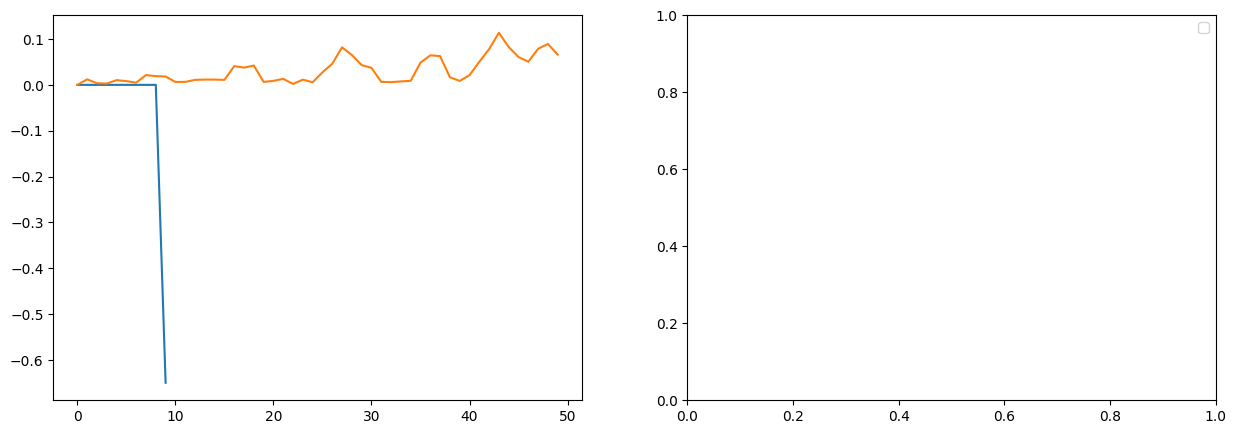

In [12]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

def plot_my_graphs(x1, x2):
    x2_ = int(x2/5)
    axes[0].plot(fixed_tc_diff_capped_array[x1:x2_])
    axes[0].set_label('fixed_tc_df_diff_capped')

    axes[0].plot((fixed_tc_df['1_abs_accel']/100)[x1:x2])
    axes[0].set_label("abs_accel")
    
plot_my_graphs(x1=0, x2=50)

plt.legend()
plt.show()